In [1]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.utils import plot_model
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
import tensorflow_probability as tfp

E0000 00:00:1724880241.755644      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D0828 21:24:01.764045205      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0828 21:24:01.764061254      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0828 21:24:01.764064515      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0828 21:24:01.764066835      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0828 21:24:01.764069206      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [13]:
df = pd.read_excel('/kaggle/input/pffp-final/PFFP_Data.xlsx', sheet_name='RAW', header=None)
# df = df.iloc[:, :212]

Dividing Input and Output

In [15]:

# Assuming 'df' is your dataframe
X = df.iloc[:211]  # Selects the first 211 rows for X
Y = df.iloc[211:212]
V = df.iloc[212:213]

In [42]:
Xa= np.array(X)
Va= np.array(V)

In [46]:
Norm_X= Xa/Va

In [54]:
non_zero_counts = np.count_nonzero(Norm_X, axis=0)

In [56]:
np.max(non_zero_counts)

203

In [57]:
max_dec = np.max(Norm_X, axis=0)

In [58]:
max_dec.shape

(447,)

In [62]:
Ya.shape

(1, 447)

In [63]:
# Convert the target variable to numeric labels if necessary
Ya= np.squeeze(np.array(Y))
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Ya)

/tmp/ipykernel_13/491526300.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


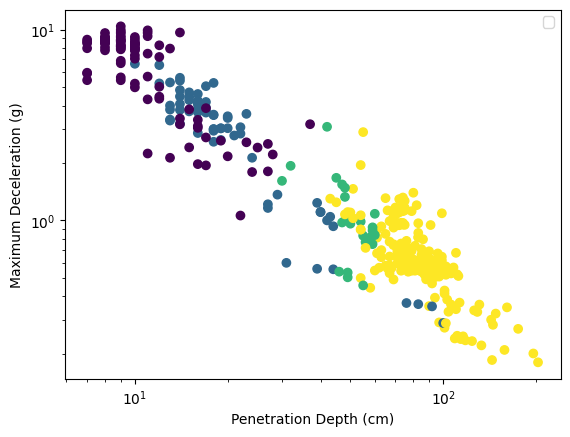

In [65]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(non_zero_counts, max_dec, c=y)

# Add labels and a title
plt.xlabel('Penetration Depth (cm)')
plt.ylabel('Maximum Deceleration (g)')
# plt.title('Scatter Plot Example')
plt.xscale('log')
plt.yscale('log')
plt.legend()
# Show the plot
plt.show()


In [ ]:
MD = pd.DataFrame(max_dec)
PD = pd.DataFrame(non_zero_counts)
y = pd.DataFrame(y)

PD.to_csv('PD.csv', index=False)
MD.to_csv('MD.csv', index=False)
y.to_csv('y.csv', index=False)


In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
XRF= np.column_stack((max_dec,non_zero_counts))

# Split data into training and testing sets
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(XRF, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_trainRF, y_trainRF)

# Predict probabilities for the test set
class_probs = clf.predict_proba(X_testRF)

# 'class_probs' now contains the class probabilities for each sample in the test set


In [ ]:
estimator = clf.estimators_[5]

In [67]:
import joblib

In [68]:
model_filename = 'random_forest_model.joblib'
joblib.dump(clf, model_filename)

['random_forest_model.joblib']

In [69]:
class_probs


array([[0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.  , 1.  ],
       [0.03, 0.97, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.04, 0.89, 0.01, 0.06],
       [0.11, 0.89, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.11, 0.  , 0.89],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.03, 0.69, 0.28],
       [0.  , 0.01, 0.02, 0.97],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.  , 0.96],
       [0.  , 0.01, 0.08, 0.91],
       [0.  , 0.  , 0.  , 1.  ],
       [0.07, 0.93, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.02, 0.02, 0.96],
       [0.02, 0.98, 0.  , 0.  ],
       [0.  , 0.72, 0.24, 0.04],
       [1.

In [ ]:
import numpy as np

# Original array with 4 values that sum up to 1
original_array = np.array([0.8 , 0.12, 0.08, 0.  ])

# Calculate the sum of the original array
original_sum = np.sum(original_array)

# Scale the array to sum up to 0.7
desired_sum = 0.8
scaled_array = (original_array / original_sum) * desired_sum

print(scaled_array+0.05)
print(np.sum(scaled_array+0.05))


In [ ]:
X_testRF[3,]

In [71]:
predRF=np.argmax(class_probs,axis=1)

In [80]:
y_testRF[np.where(predRF!=y_testRF)]

array([0, 3, 0, 3, 3, 0, 1, 3, 3, 1, 0, 0, 3])

In [81]:
predRF[np.where(predRF!=y_testRF)]

array([1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2])

In [73]:
predRF_value=np.max(class_probs,axis=1)

In [ ]:
X_testRF_DF = pd.DataFrame(X_testRF)
y_testRF_DF = pd.DataFrame(y_testRF)
predRF_DF = pd.DataFrame(predRF)
predRF_value_DF = pd.DataFrame(predRF_value)
X_testRF_DF.to_csv('X_testRF_DF.csv', index=False)
y_testRF_DF.to_csv('y_testRF_DF.csv', index=False)
predRF_DF.to_csv('predRF_DF.csv', index=False)
predRF_value_DF.to_csv('predRF_value_DF.csv', index=False)

In [ ]:
X_testRF_DF.to_csv('X_testRF_DF.csv', index=False)
y_testRF_DF.to_csv('y_testRF_DF.csv', index=False)
predRF_DF.to_csv('predRF_DF.csv', index=False)
predRF_value_DF.to_csv('predRF_value_DF.csv', index=False)

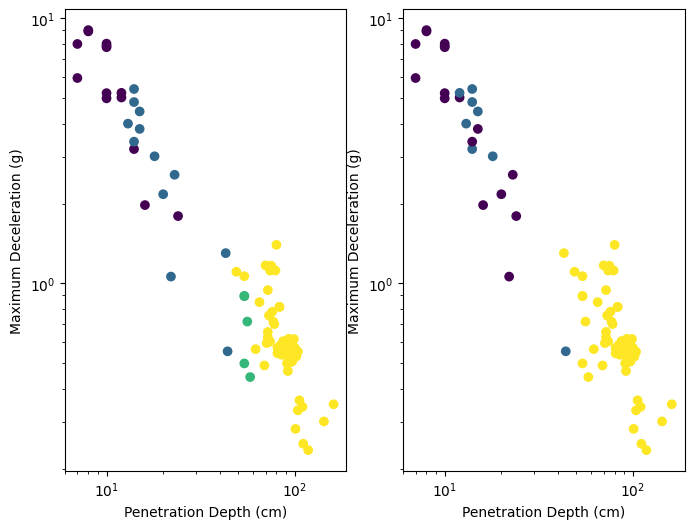

In [74]:
from matplotlib.axis import YTick
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].scatter(X_testRF[:,1], X_testRF[:,0], c=predRF)

# Add labels and a title
axs[0].set_xlabel('Penetration Depth (cm)')
axs[0].set_ylabel('Maximum Deceleration (g)')
# plt.title('Scatter Plot Example')
axs[0].set_xscale('log')
axs[0].set_yscale('log')


axs[1].scatter(X_testRF[:,1], X_testRF[:,0], c=y_testRF)

# Add labels and a title
axs[1].set_xlabel('Penetration Depth (cm)')
axs[1].set_ylabel('Maximum Deceleration (g)')
# plt.title('Scatter Plot Example')
axs[1].set_xscale('log')
axs[1].set_yscale('log')


plt.show()

In [ ]:
import numpy as np

# Original array with 4 values that sum up to 1
original_array = np.array([0.0, 0.0, 0.0, 1])

# Define the new min and max values
new_min = 0.1
new_max = 0.9

# Step 1: Calculate the range of values in the original array
original_range = np.max(original_array) - np.min(original_array)

# Step 2: Calculate the range of values in the new range
new_range = new_max - new_min

# Step 3: Scale the values to the new range
scaled_array = new_min + ((original_array - np.min(original_array)) / original_range) * new_range

# Step 4: Normalize the scaled values so they sum up to 1
scaled_array /= np.sum(scaled_array)

print("Original Array:", original_array)
print("Scaled and Normalized Array:", scaled_array)
print("Sum of Scaled Array:", np.sum(scaled_array))


Scalling the Input

In [89]:
Norm_X.shape

(211, 447)

In [93]:


# Flatten the array to 1D
Norm_X_flattened = Norm_X.flatten()

# Create a MinMaxScaler object with range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the flattened array
Norm_X_scaled_flat = scaler.fit_transform(Norm_X_flattened.reshape(-1, 1))

# Reshape back to the original shape (211, 447)
Norm_X_scaled = Norm_X_scaled_flat.reshape(211, 447)


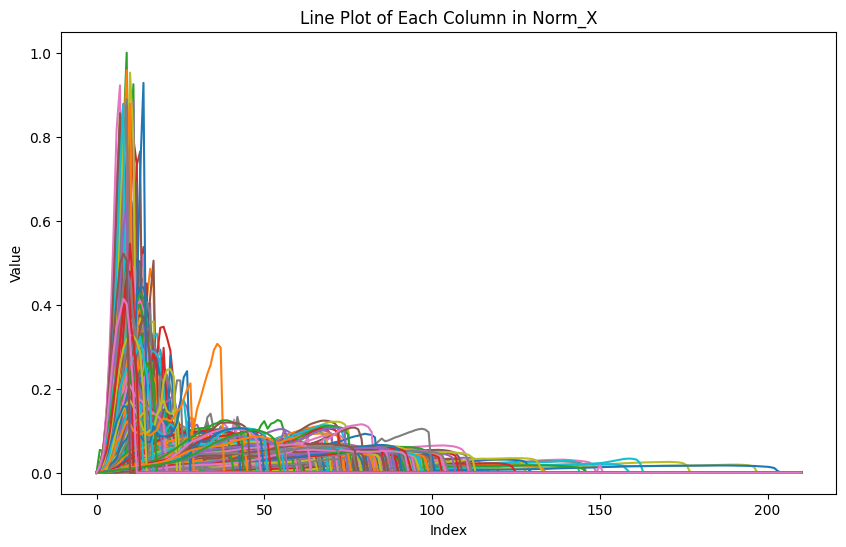

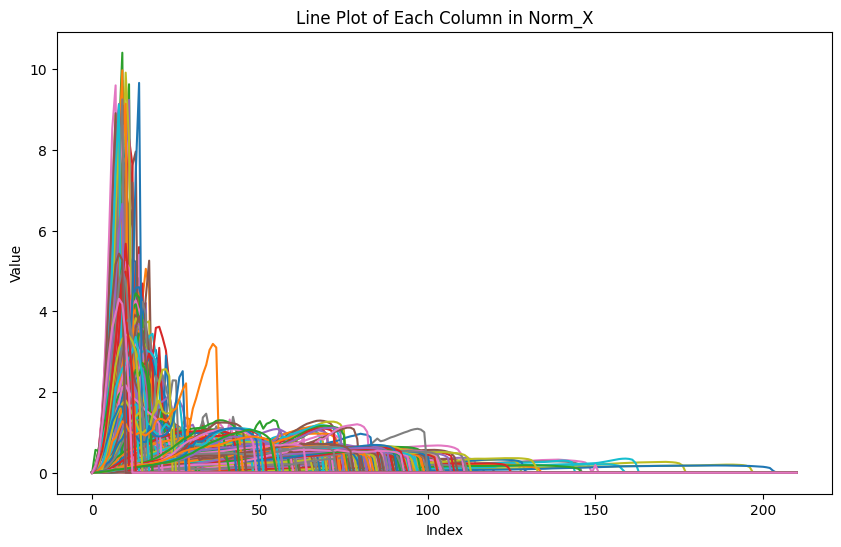

In [96]:

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
for i in range(Norm_X_scaled.shape[1]):  # Loop through each column
    plt.plot(Norm_X_scaled[:, i], label=f'Column {i}')

plt.title('Line Plot of Each Column in Norm_X')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the plot
plt.show()

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
for i in range(Norm_X.shape[1]):  # Loop through each column
    plt.plot(Norm_X[:, i], label=f'Column {i}')

plt.title('Line Plot of Each Column in Norm_X')
plt.xlabel('Index')
plt.ylabel('Value')
 # Add a legend if desired, can be toggled off for clarity with many lines

# Show the plot
plt.show()

In [97]:
scaler_filename = 'scaler_fit.joblib'
joblib.dump(scaler, scaler_filename)

['scaler_fit.joblib']

In [98]:
Norm_X_scaled.shape

(211, 447)

Test Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
print(sum(y_train==0))
print(sum(y_train==1))
print(sum(y_train==2))
print(sum(y_train==3))

In [ ]:
print(sum(y_test==0))
print(sum(y_test==1))
print(sum(y_test==2))
print(sum(y_test==3))

In [ ]:
17+6+1+44

Oversampling

In [ ]:
ada = ADASYN(random_state=50)
X_train_balanced, y_train_balanced = ada.fit_resample(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt

# Plot all time series in x_train with different colors
mmmm=300
for i in range(mmmm,mmmm+10):
    plt.plot(X_train_balanced[i].flatten(), label=f'Sample {i+1}')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Series')

plt.show()

In [ ]:
print(sum(y_train_balanced==0))
print(sum(y_train_balanced==1))
print(sum(y_train_balanced==2))
print(sum(y_train_balanced==3))

In [ ]:

X_test = np.reshape(X_test,[X_test.shape[0],X_test.shape[1],1])


One Hot Encoding

In [ ]:
y_train_hot = to_categorical(y_train_balanced, num_classes=4)

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

# Define the kernel divergence function
def kernel_divergence_fn(q, p, _):
    return tfp.distributions.kl_divergence(q, p) / float(X_train_balanced.shape[0])

# Model building
class BayesianConv1DModel(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.conv1 = tfp.layers.Convolution1DFlipout(32, kernel_size=3, activation='relu', 
                                                     kernel_divergence_fn=kernel_divergence_fn, 
                                                     padding='VALID')
        self.conv2 = tfp.layers.Convolution1DFlipout(64, kernel_size=3, activation='relu', 
                                                     kernel_divergence_fn=kernel_divergence_fn, 
                                                     padding='VALID')
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tfp.layers.DenseFlipout(1024, activation='relu', kernel_divergence_fn=kernel_divergence_fn)
        self.dense2 = tfp.layers.DenseFlipout(64, activation='relu', kernel_divergence_fn=kernel_divergence_fn)
        self.dense3 = tfp.layers.DenseFlipout(4, activation='softmax', kernel_divergence_fn=kernel_divergence_fn)

    def __call__(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# Instantiate the model
model = BayesianConv1DModel()

# Define loss function
def loss_fn(labels, predictions):
    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(labels, predictions))

# Define the training step
def train_step(model, inputs, labels, optimizer):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# # Example training loop
# optimizer = tf.keras.optimizers.Adam()
# for epoch in range(epochs):
#     for inputs, labels in dataset:
#         loss = train_step(model, inputs, labels, optimizer)
#     print(f"Epoch {epoch}, Loss: {loss.numpy()}")

In [ ]:
# Create a new model instance (make sure the architecture is the same)
model = BayesianConv1DModel()

# Create a checkpoint object for the new model
checkpoint = tf.train.Checkpoint(model=model)

# Restore the weights
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest_checkpoint)

In [ ]:
import numpy as np

X_train_balanced = np.reshape(X_train_balanced, (X_train_balanced.shape[0], 211, 1))
# Convert the training data to a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_balanced, y_train_hot))

# Batch the dataset and shuffle it if necessary
train_dataset = train_dataset.batch(32).shuffle(buffer_size=100)

In [ ]:
# Example training loop
optimizer = tf.keras.optimizers.Adam()
for epoch in range(35):
    for inputs, labels in train_dataset:
        loss = train_step(model, inputs, labels, optimizer)
    print(f"Epoch {epoch}, Loss: {loss.numpy()}")

In [ ]:
import tensorflow as tf
import os
# Create a checkpoint object
checkpoint = tf.train.Checkpoint(model=model)

# Save the checkpoint to a directory
checkpoint_dir = './checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
import tensorflow as tf

# Assuming `model` is an instance of a class derived from tf.Module
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.write('finmodel.ckpt')

In [ ]:
# Create a new model instance
model23 = BayesianConv1DModel()

# Restore the weights
checkpoint = tf.train.Checkpoint(model=model23)
checkpoint.restore('finmodel.ckpt')

In [ ]:
# Make predictions
predictions = predict(model23, X_test)
print(predictions)

Testing

In [ ]:
import numpy as np

# Function to predict new data
def predict(model, new_data):
    """
    Generates predictions from the model for the given new data.

    Args:
    model: The trained Bayesian neural network model.
    new_data: A NumPy array or a TensorFlow tensor of new data to predict.

    Returns:
    A NumPy array of predictions.
    """
    # Ensure the input is a TensorFlow tensor
    new_data = tf.convert_to_tensor(new_data, dtype=tf.float32)

    # Perform a forward pass and obtain the logits
    logits = model(new_data)
    
    # Since the last layer uses softmax, the output will be the probabilities
    probabilities = tf.nn.softmax(logits)

    # Optionally, you can obtain the class predictions directly
#     class_predictions = tf.argmax(logits, axis=1)

    return probabilities.numpy()  # Convert probabilities to NumPy array for easier handling

# Example usage
# Assuming `X_new` is your new dataset ready to be predicted
# X_new = np.random.random((10, sequence_length, channels))  # Dummy data for illustration
# predictions = predict(model, X_new)
# print(predictions)

In [ ]:
# Example usage
# Assuming `X_new` is your new dataset ready to be predicted
# X_new = np.random.random((10, sequence_length, channels))  # Dummy data for illustration
predictions = predict(model, X_test)
class_predictions = tf.argmax(predictions, axis=1)
print(predictions)
print(class_predictions)

In [ ]:
y_test=np.squeeze(np.array(y_test))

In [ ]:
np.count_nonzero(np.argmax(predictions,axis=1)==y_test)/len(y_test)*100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming predictions is the output from model.predict() and y_test is your true labels

# Convert predicted probabilities to class predictions
predicted_classes = np.argmax(predictions, axis=1)

# Compute the normalized confusion matrix
cm = confusion_matrix(y_test, predicted_classes, normalize='true')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')  # Adjust format for percentage

# Display the plot
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

# Optionally, print the accuracy
accuracy = np.count_nonzero(predicted_classes == y_test) / len(y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
tf.saved_model.save(model,'/kaggle/working/main_folder/')

In [ ]:
loaded_model = keras.models.load_model('/kaggle/working/main_folder')

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

# Define the kernel divergence function
def kernel_divergence_fn(q, p, _):
    return tfp.distributions.kl_divergence(q, p) / float(X_train_balanced.shape[0])
# Model building
class BayesianConv1DModel2(tf.keras.Model):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.conv1 = tfp.layers.Convolution1DFlipout(32, kernel_size=3, activation='relu', 
                                                     kernel_divergence_fn=kernel_divergence_fn, 
                                                     padding='VALID')
        self.conv2 = tfp.layers.Convolution1DFlipout(64, kernel_size=3, activation='relu', 
                                                     kernel_divergence_fn=kernel_divergence_fn, 
                                                     padding='VALID')
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tfp.layers.DenseFlipout(1024, activation='relu', kernel_divergence_fn=kernel_divergence_fn)
        self.dense2 = tfp.layers.DenseFlipout(64, activation='relu', kernel_divergence_fn=kernel_divergence_fn)
        self.dense3 = tfp.layers.DenseFlipout(4, activation='softmax', kernel_divergence_fn=kernel_divergence_fn)

    def __call__(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# Instantiate the model
model2 = BayesianConv1DModel2()

# Define loss function
def loss_fn(labels, predictions):
    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(labels, predictions))

# Define the training step
def train_step(model, inputs, labels, optimizer):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# # Example training loop
# optimizer = tf.keras.optimizers.Adam()
# for epoch in range(epochs):
#     for inputs, labels in dataset:
#         loss = train_step(model, inputs, labels, optimizer)
#     print(f"Epoch {epoch}, Loss: {loss.numpy()}")

# # Example training loop
# optimizer = tf.keras.optimizers.Adam()
# for epoch in range(epochs):
#     for inputs, labels in dataset:
#         loss = train_step(model, inputs, labels, optimizer)
#     print(f"Epoch {epoch}, Loss: {loss.numpy()}")

In [ ]:
optimizer = tf.keras.optimizers.Adam()
for epoch in range(3):
    for inputs, labels in train_dataset:
        loss = train_step(model2, inputs, labels, optimizer)
    print(f"Epoch {epoch}, Loss: {loss.numpy()}")

In [ ]:


# Specify the path to the directory where the model was saved
model_directory = '/kaggle/working/main_folder/'

# Load the model
loaded_model = tf.saved_model.load(model_directory)

# You can now use loaded_model to perform predictions or further processing

In [ ]:
model.save('/kaggle/working/main_folder/')

In [ ]:
# Load the weights from the save directory
model.load_weights('/kaggle/working/main_folder/variables/variables')

In [ ]:
# Assuming the model has a default serving function
infer = loaded_model.signatures['serving_default']

# To make predictions, provide input data as a TensorFlow tensor
# Example: predicting using input data 'input_tensor'
# predictions = infer(input_tensor=tf.constant([[your_input_data]]))  # Adjust your_input_data accordingly

# print(predictions)

In [ ]:
loaded_model(X_test)

In [ ]:
model.load_weights(tf.train.latest_checkpoint('/kaggle/working/variables'))

In [ ]:
predictions = predict(loaded_model, X_test)
class_predictions = tf.argmax(predictions, axis=1)
print(predictions)
print(class_predictions)

In [ ]:
      # Create a directory if it is not there, so we can save files and results in it
from pathlib import Path
Path('/kaggle/working/main_folder').mkdir(parents=True, exist_ok=True)


In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual file path
file_path = '/content/try_pred.xlsx'

# Read the XLSX file into a pandas DataFrame
dfp = pd.read_excel(file_path,header=None)

dfp

In [ ]:
pred_in=dfp.iloc[:, :211]
pred_in = np.array(pred_in)

In [ ]:
pred_in_scaled = scaler.transform(pred_in.reshape(-1, 1)).reshape(pred_in.shape)

In [ ]:
X_test.shape

In [ ]:
pred_in_scaled = np.reshape(pred_in_scaled,[pred_in_scaled.shape[0],pred_in_scaled.shape[1],1])
likelihood=model_vi.predict(pred_in_scaled)

In [ ]:
pred_pd = np.count_nonzero(pred_in, axis=1)
pred_dec = np.max(pred_in, axis=1)

In [ ]:
pred_arrayRF= np.column_stack((pred_dec,pred_pd))

In [ ]:
ab=clf.predict_proba(pred_arrayRF)

In [ ]:
import numpy as np

# Original array with 4 values that sum up to 1
original_array = np.array(ab)

# Calculate the sum of the original array
original_sum = np.sum(original_array)

# Scale the array to sum up to 0.7
desired_sum = 0.6
pad=0.1
scaled_array = (original_array / original_sum) * desired_sum
scaled_array=scaled_array+pad
print(scaled_array)
print(np.sum(scaled_array))


In [ ]:
likelihood

In [ ]:
import numpy as np

# Original array with 4 values that sum up to 1
original_array2 = np.array(likelihood)

# Calculate the sum of the original array
original_sum2 = np.sum(original_array2)

# Scale the array to sum up to 0.7
desired_sum2 = 0.6
pad2=0.1
scaled_array2 = (original_array2 / original_sum2) * desired_sum2
scaled_array2=scaled_array2+pad2
print(scaled_array2)
print(np.sum(scaled_array2))

In [ ]:
post=((scaled_array)*scaled_array2)

In [ ]:
np.sum(post)

In [ ]:
post/np.sum(post)

In [ ]:
categories = ['Category A', 'Category B', 'Category C', 'Category D']
plt.bar(categories,np.squeeze(post/np.sum(post)))

In [ ]:
plt.bar(categories,np.squeeze(scaled_array))
plt.bar(categories,np.squeeze(scaled_array2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test is an array containing your test data
n = 0  # Index of the specific data point you want to plot

# Find the index of the maximum value
max_index = np.argmax(X_test[n])

# Find the index where the values become zero after the maximum value
zero_index = np.where(X_test[n][max_index:] == 0)[0]
if zero_index.size > 0:
    zero_index = zero_index[0] + max_index
else:
    zero_index = len(X_test[n])

# Trim the array from the maximum value up to the zero_index
trimmed_X_test = X_test[n][max_index:zero_index]

# Create the plot
plt.plot(trimmed_X_test, range(len(trimmed_X_test)))

# Set labels for the plot
plt.xlabel('Value')
plt.ylabel('Index')

# Display the plot
plt.show()

In [ ]:
for n in range(68):
  ss =[]
  # n= int(input())

  classes = ['Class 1','Class 2','Class 3','Class 4']
  c = [1,2,3,4]
  plt.figure()
  fig, ax = plt.subplots(1,2)

  for i in range(0,30):
    s = model_vi.predict(X_test[n:n+1],verbose = 1)
    ss.append(s)
    ax[1].scatter(c,s,c="blue",alpha=0.1)

  sss = pd.DataFrame(np.squeeze(ss))
  ax[1].boxplot(sss)
  ax[1].set_xticklabels(classes)
  ax[1].text(1.8, -0.25, 'Actual Result: Class '+str(y_test[n]+1), color='red')


  max_index = np.argmax(X_test[n])

  # Find the index where the values become zero after the maximum value
  zr = np.where(X_test[n]==0)
  zr = np.squeeze(zr)
  zero_index=np.min(zr[zr>max_index])+1

  # Trim the array from the maximum value up to the zero_index
  trimmed_X_test = X_test[n][0:zero_index]

  ax[0].plot(np.max(X)*trimmed_X_test.flatten(),range(len(trimmed_X_test.flatten())))
  ax[0].invert_yaxis()
  print(y_test[n])

In [ ]:
print(X_test.shape)
X2= np.reshape(X_train,[362,211,1])

In [ ]:
N = [0,3,14]
for n in N:
  ss =[]
  # n= int(input())

  classes = ['Class 1','Class 2','Class 3','Class 4']
  c = [1,2,3,4]
  plt.figure()
  fig, ax = plt.subplots(1,2)

  for i in range(0,30):
    s = model_vi.predict(X2[n:n+1],verbose = 1)
    ss.append(s)
    ax[1].scatter(c,s,c="blue",alpha=0.1)

  sss = pd.DataFrame(np.squeeze(ss))
  ax[1].boxplot(sss)
  ax[1].set_xticklabels(classes)
  ax[1].text(1.8, -0.25, 'Actual Result: Class '+str(y_train[n]+1), color='red')


  max_index = np.argmax(X_train[n])

  # Find the index where the values become zero after the maximum value
  zr = np.where(X_train[n]==0)
  zr = np.squeeze(zr)
  zero_index=np.min(zr[zr>max_index])+1

  # Trim the array from the maximum value up to the zero_index
  trimmed_X_test = X_train[n][0:zero_index]

  ax[0].plot(np.max(X)*trimmed_X_test.flatten(),range(len(trimmed_X_test.flatten())))
  ax[0].invert_yaxis()
  print(y_train[n])

In [ ]:
import matplotlib.style as style


plt.rcParams['font.family'] = 'sans-serif'
plt.style.use('classic')
N = np.arange(0,68,1)
# N =[0]
for n in N:
  ss =[]
  # n= int(input())

  classes = ['Class 1','Class 2','Class 3','Class 4']
  c = [1,2,3,4]
  plt.figure()
  fig, ax = plt.subplots(1,2)

  for i in range(0,30):
    s = model_vi.predict(X_test[n:n+1],verbose = 0)
    ss.append(s)
    ax[1].scatter(c,s,c="blue",alpha=0.1)

  sss = pd.DataFrame(np.squeeze(ss))
  ax[1].boxplot(sss)
  # ax[1].set_xticklabels(classes)
  ax[1].text(1.8, -0.3, 'Actual Result: Class '+str(y_test[n]+1), color='red')
  ax[1].set_title('Uncertainty Estimation')
  ax[1].set_ylabel('Probability of Obtaining a Class')
  ax[1].set_xlabel('Class No.')
  plt.ylim(-0.1,1)


  max_index = np.argmax(X_test[n])

  # Find the index where the values become zero after the maximum value
  zr = np.where(X_test[n]==0)
  zr = np.squeeze(zr)
  zero_index=np.min(zr[zr>max_index])+1

  # Trim the array from the maximum value up to the zero_index
  trimmed_X_test = X_test[n][0:zero_index]

  ax[0].plot(np.max(X)*trimmed_X_test.flatten(),range(len(trimmed_X_test.flatten())))
  ax[0].invert_yaxis()
  ax[0].set_xlabel('Deceleration [g]')
  ax[0].set_ylabel('Penetration Depth [cm]')
  ax[0].set_title('Deceleration Curve')
  plt.tight_layout()
  # sp='/content/drive/MyDrive/Journal Paper 1'+str(n)+'.png'
  # fig.savefig(sp,dpi=300,bbox_inches='tight',facecolor='w')

  print(y_test[n])

In [ ]:

model_vi.save("/content/drive/MyDrive/Journal Paper 1/my_saved_model")


In [ ]:
model_vi.save("/content/drive/MyDrive/Journal Paper 1/my_saved_model.h5")

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Journal Paper 1/my_saved_model")

# Use the loaded model for prediction
predictions = loaded_model.predict(X_test[0:1])


In [ ]:
predictions

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_vi.predict(X_test)
cm = confusion_matrix(y_test, y_pred_labels)

In [ ]:
y_pred_labels

In [ ]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Define the class labels
class_labels = np.unique(y_test)
C = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, C)
plt.yticks(tick_marks, C)

# Add labels to each cell in the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Save the training dataset as a NumPy array.
np.save('X_test.npy', X_test)

# Save the testing dataset as a NumPy array.
np.save('y_test.npy', y_test)

# Save the training dataset as a NumPy array.
np.save('X_train.npy', X2)

# Save the testing dataset as a NumPy array.
np.save('y_train.npy', y_train)

In [ ]:
model_vi.save("/content/drive/MyDrive/Journal Paper 1/my_saved_model2")

In [ ]:
X_test.shape

In [ ]:
import numpy as np

# using loadtxt()
arr = pd.read_csv("/content/sydney_pred.csv", header=None)

SydTest = np.array(arr)


In [ ]:
sddd=np.reshape(SydTest,[3,211,1])

In [ ]:
sddd.shape

In [ ]:
import matplotlib.style as style


plt.rcParams['font.family'] = 'sans-serif'
plt.style.use('classic')
N = np.arange(0,3,1)
# N =[0]
for n in N:
  ss =[]
  # n= int(input())

  classes = ['Class 1','Class 2','Class 3','Class 4']
  c = [1,2,3,4]
  plt.figure()
  fig, ax = plt.subplots()

  for i in range(0,30):
    s = model_vi.predict(sddd[n:n+1],verbose = 0)
    ss.append(s)
    ax.scatter(c,s,c="blue",alpha=0.1)

  sss = pd.DataFrame(np.squeeze(ss))
  ax.boxplot(sss)
  # ax[1].set_xticklabels(classes)
  # ax[1].text(1.8, -0.3, 'Actual Result: Class '+str(y_test[n]+1), color='red')
  ax.set_title('Uncertainty Estimation')
  ax.set_ylabel('Probability of Obtaining a Class')
  ax.set_xlabel('Class No.')
  plt.ylim(-0.1,1)


  # max_index = np.argmax(sddd[n])

  # # Find the index where the values become zero after the maximum value
  # zr = np.where(sddd[n]==0)
  # zr = np.squeeze(zr)
  # zero_index=np.min(zr[zr>max_index])+1

  # # Trim the array from the maximum value up to the zero_index
  # trimmed_X_test = sddd[n][0:zero_index]

  # ax[0].plot(np.max(X)*trimmed_X_test.flatten(),range(len(trimmed_X_test.flatten())))
  # ax[0].invert_yaxis()
  # ax[0].set_xlabel('Deceleration [g]')
  # ax[0].set_ylabel('Penetration Depth [cm]')
  # ax[0].set_title('Deceleration Curve')
  # plt.tight_layout()
  # sp='/content/drive/MyDrive/Journal Paper 1'+str(n)+'.png'
  # fig.savefig(sp,dpi=300,bbox_inches='tight',facecolor='w')

  print(y_test[n])

In [ ]:
model_vi.predict(sddd[0:1],verbose = 0)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
sd_scaled = scaler.fit_transform(SydTest.reshape(-1, 1)).reshape(SydTest.shape)

In [ ]:
sddd=np.reshape(sd_scaled,[3,211,1])

In [ ]:
X.shape


In [ ]:
sdl=np.reshape(SydTest,[3,211])

In [ ]:
sdl.shape

In [ ]:
sdplusx= np.vstack((X,sdl))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
sd_scaled = scaler.fit_transform(sdplusx.reshape(-1, 1)).reshape(sdplusx.shape)

In [ ]:
sddd=np.reshape(sd_scaled,[452,211,1])

In [ ]:
sddd[449:450]